<a href="https://colab.research.google.com/github/YUEWU1233/Pacific-firms-with-available-scope-1-to-3-carbon-emissions/blob/main/G14_Pacific_firms_with_available_scope_1_to_3_carbon_emissions_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data preparation

In [ ]:
import pandas as pd
import scipy.optimize as sco
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.optimize import minimize

##Data accessing via Github and data cleaning

##Countries to Regions

In [ ]:
df_CountriesToRegions = pd.read_excel('https://raw.githubusercontent.com/YUEWU1233/Pacific-firms-with-available-scope-1-to-3-carbon-emissions/main/CountriesToRegions.xlsx')
df_CountriesToRegions.head(6)

In [ ]:
#drop useless data

df_CountriesToRegions = df_CountriesToRegions.iloc[4:]

# reset column name
new_header = df_CountriesToRegions.iloc[0]  # new column name
df_CountriesToRegions = df_CountriesToRegions[1:]
df_CountriesToRegions.columns = new_header

df_CountriesToRegions.reset_index(drop=True, inplace=True)
df_CountriesToRegions


In [ ]:
df_PAC = df_CountriesToRegions[df_CountriesToRegions['Region']=="PAC"]
df_PAC

Here we get 5 Pacific countries and areas: Australia, Hong Kong, Japan, New Zealand and Singaore

## Return Index

In [ ]:
df_DS_RI_T_USD_M = pd.read_excel("https://raw.githubusercontent.com/YUEWU1233/Pacific-firms-with-available-scope-1-to-3-carbon-emissions/main/DS_RI_T_USD_M.xlsx")
df_return_PAC = df_DS_RI_T_USD_M[df_DS_RI_T_USD_M['ISIN'].str.startswith(('JP', 'NZ', 'HK', 'AU', 'SG'))]

df_RI = df_return_PAC.set_index('NAME').T[1:]

# reset
df_RI.reset_index(inplace=True)
df_RI.rename(columns={'index': 'Date'}, inplace=True)

# put it into date form
df_RI['Date'] = pd.to_datetime(df_RI['Date']).dt.date
df_RI.set_index('Date', inplace=True)
df_RI.index.name = ''
df_RI.columns.name = ''

df_RI = df_RI.apply(pd.to_numeric, errors='coerce')

df_RI

##Market value

In [ ]:
df_DS_MV_USD_M = pd.read_excel("https://raw.githubusercontent.com/YUEWU1233/Pacific-firms-with-available-scope-1-to-3-carbon-emissions/main/DS_MV_USD_M.xlsx")
PAC = ('AU', 'HK', 'JP', 'NZ', 'SG')
df_MV_PAC = df_DS_MV_USD_M[df_DS_MV_USD_M['ISIN'].str.startswith(PAC)]
df_MV_PAC

In [ ]:
# df_MV_full includes market value during 2000-2022
df_MV_full = df_MV_PAC.set_index('NAME').T[1:]
df_MV_full.reset_index(inplace=True)
df_MV_full.rename(columns={'index': 'Date'}, inplace=True)
df_MV_full['Date'] = pd.to_datetime(df_MV_full['Date']).dt.date
df_MV_full.set_index('Date', inplace=True)
df_MV_full.index = pd.to_datetime(df_MV_full.index)
df_MV = df_MV_full[(df_MV_full.index.year >= 2008) & (df_MV_full.index.year <= 2022)]

# df_MV includes data during 2008-2022
df_MV

##Carbon Emission

In [ ]:
df_Static_Carbon = pd.read_excel("https://raw.githubusercontent.com/YUEWU1233/Pacific-firms-with-available-scope-1-to-3-carbon-emissions/main/Static_Carbon.xlsx")
df_Static_Carbon_PAC = df_Static_Carbon[df_Static_Carbon['Region']=='PAC']
df_Static_Carbon_PAC

In [ ]:
df_TC_Revenue = pd.read_excel("https://raw.githubusercontent.com/YUEWU1233/Pacific-firms-with-available-scope-1-to-3-carbon-emissions/main/TC_Revenue.xlsx")
df_TC_Revenue

In [ ]:
df_TC_Revenue_2007 =  df_TC_Revenue.loc[:, 2007:]

df_TC_Revenue_2007.insert(0, 'NAME', df_TC_Revenue['NAME'])
df_TC_Revenue_2007.insert(0, 'ISIN', df_TC_Revenue['ISIN'])


prefixes = ('AU', 'HK', 'JP', 'NZ', 'SG')
df_TC_Revenue_2007_PAC = df_TC_Revenue_2007[df_TC_Revenue_2007['ISIN'].str.startswith(prefixes)]
df_TC_Revenue_2007_PAC

In [ ]:
df_TC_Scope1 = pd.read_excel("https://raw.githubusercontent.com/YUEWU1233/Pacific-firms-with-available-scope-1-to-3-carbon-emissions/main/TC_Scope1.xlsx")
df_TC_Scope1

In [ ]:
df_TC_Scope1_2007 =  df_TC_Scope1.loc[:, 2007:]

df_TC_Scope1_2007.insert(0, 'NAME', df_TC_Scope1['NAME'])
df_TC_Scope1_2007.insert(0, 'ISIN', df_TC_Scope1['ISIN'])


df_TC_Scope1_2007_PAC = df_TC_Scope1_2007[df_TC_Scope1_2007['ISIN'].str.startswith(prefixes)]
df_TC_Scope1_2007_PAC

In [ ]:
df_TC_Scope1Intensity = pd.read_excel("https://raw.githubusercontent.com/YUEWU1233/Pacific-firms-with-available-scope-1-to-3-carbon-emissions/main/TC_Scope1Intensity.xlsx")
df_TC_Scope1Intensity_2007 =  df_TC_Scope1Intensity.loc[:, 2007:]

df_TC_Scope1Intensity_2007.insert(0, 'NAME', df_TC_Scope1Intensity['NAME'])
df_TC_Scope1Intensity_2007.insert(0, 'ISIN', df_TC_Scope1Intensity['ISIN'])



prefixes = ('AU', 'HK', 'JP', 'NZ', 'SG')
df_TC_Scope1Intensity_2007_PAC = df_TC_Scope1Intensity_2007[df_TC_Scope1Intensity_2007['ISIN'].str.startswith(prefixes)]
df_TC_Scope1Intensity_2007_PAC

In [ ]:
df_TC_Scope2 = pd.read_excel("https://raw.githubusercontent.com/YUEWU1233/Pacific-firms-with-available-scope-1-to-3-carbon-emissions/main/TC_Scope2.xlsx")
df_TC_Scope2_2007 =  df_TC_Scope2.loc[:, 2007:]

df_TC_Scope2_2007.insert(0, 'NAME', df_TC_Scope2['NAME'])
df_TC_Scope2_2007.insert(0, 'ISIN', df_TC_Scope2['ISIN'])


prefixes = ('AU', 'HK', 'JP', 'NZ', 'SG')
df_TC_Scope2_2007_PAC = df_TC_Scope2_2007[df_TC_Scope2_2007['ISIN'].str.startswith(prefixes)]
df_TC_Scope2_2007_PAC

,ISIN,NAME,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
13,AU000000ABC7,ADBRI Limited,113948.970000,99623.460957,111194.980000,105561.000000,1.025640e+05,9.833259e+04,9.591544e+04,9.359824e+04,9.795083e+04,8.141641e+04,113128.750000,1.160488e+05,230539.00000,207537.314,197118.000
14,AU000000ALL7,Aristocrat Leisure Limited,3306.663750,2423.426483,2643.065749,1975.978321,2.193230e+03,1.774537e+03,2.343920e+03,2.671638e+03,4.273416e+03,5.660987e+03,7420.979451,8.548668e+04,84687.61600,57975.487,84443.055
15,AU000000AMP6,AMP Limited,11294.970000,3951.980000,11992.202227,11960.200195,1.866496e+04,2.205678e+04,2.071509e+04,1.826200e+04,1.569400e+04,1.179780e+04,9606.000000,8.239000e+03,8145.98700,6407.767,4842.000
16,AU000000ANN9,Ansell Limited,16272.416230,17866.115798,16263.629422,15761.841358,9.674612e+04,8.800698e+04,9.487168e+04,1.286744e+05,1.267299e+05,1.239553e+05,111512.000000,9.216300e+04,93479.31400,95528.358,30758.465
17,AU000000ANZ3,ANZ Group Holdings Limited,198270.980000,168884.850000,183433.846842,182827.000000,2.062200e+05,2.054620e+05,2.041080e+05,1.946660e+05,1.868440e+05,1.724644e+05,161969.000000,1.530420e+05,140319.00000,122331.000,104984.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1371,SG1U68934629,Keppel Corporation Limited,200780.652639,183720.462605,210084.396642,190209.100122,1.769481e+05,2.743471e+05,3.215370e+05,2.812400e+05,2.342940e+05,2.362500e+05,373842.000000,2.377220e+05,200759.00000,181928.000,130433.000
1372,SG1V61937297,Singapore Airlines Limited,31910.222713,37033.422974,79504.000000,29792.445069,3.103932e+04,4.149605e+04,3.855820e+04,3.671985e+04,2.496519e+04,2.308892e+04,24557.769000,2.632731e+04,24631.39200,12287.651,8644.794
1373,SG2B80958517,OUE Limited,10321.639080,9247.574967,7651.034435,11914.218620,1.810958e+04,2.194670e+04,2.207326e+04,2.414439e+04,2.162391e+04,4.115634e+04,35559.000000,4.339200e+04,59047.16145,28229.000,28106.000
1374,SG9999000020,Flex Ltd.,65027.693925,89859.024687,65845.107972,76267.947387,1.361889e+06,1.371021e+06,1.083091e+06,1.130274e+06,1.107710e+06,1.102411e+06,968621.000000,1.014373e+06,822823.41200,724465.000,639217.000


In [ ]:
df_TC_Scope2Intensity = pd.read_excel("https://raw.githubusercontent.com/YUEWU1233/Pacific-firms-with-available-scope-1-to-3-carbon-emissions/main/TC_Scope2Intensity.xlsx")
df_TC_Scope2Intensity_2007 =  df_TC_Scope2Intensity.loc[:, 2007:]

df_TC_Scope2Intensity_2007.insert(0, 'NAME', df_TC_Scope2Intensity['NAME'])
df_TC_Scope2Intensity_2007.insert(0, 'ISIN', df_TC_Scope2Intensity['ISIN'])



prefixes = ('AU', 'HK', 'JP', 'NZ', 'SG')
df_TC_Scope2Intensity_2007_PAC = df_TC_Scope2Intensity_2007[df_TC_Scope2Intensity_2007['ISIN'].str.startswith(prefixes)]
df_TC_Scope2Intensity_2007_PAC

,ISIN,NAME,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
13,AU000000ABC7,ADBRI Limited,146.220388,141.581641,125.522106,107.534379,90.344448,80.590587,80.988116,77.625287,92.374682,78.479772,94.667737,95.309255,218.641679,207.364,167.311
14,AU000000ALL7,Aristocrat Leisure Limited,3.359816,3.260708,3.234324,3.163237,3.018439,2.965517,2.921035,3.425050,3.463065,3.615910,3.973632,31.684000,27.372000,20.687,23.731
15,AU000000AMP6,AMP Limited,1.205534,0.604001,1.994363,1.619960,1.647564,1.259092,1.067926,1.151229,1.487618,1.065000,0.703041,1.281000,0.498000,2.717,3.189
16,AU000000ANN9,Ansell Limited,15.455588,14.999677,14.878310,14.551298,79.900497,70.060539,69.009628,80.917125,77.034759,78.811848,81.129138,61.862666,62.361000,59.198,15.175
17,AU000000ANZ3,ANZ Group Holdings Limited,20.274744,17.598153,15.271507,12.954418,11.880930,11.175527,11.151376,10.152477,10.139230,9.159000,8.357000,9.492000,11.085000,12.126,7.769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1371,SG1U68934629,Keppel Corporation Limited,27.678616,22.440994,24.083046,24.441772,22.062213,24.914884,32.498654,26.825922,31.293709,48.226940,86.593272,53.771519,36.128759,38.172,20.323
1372,SG1V61937297,Singapore Airlines Limited,3.339734,3.199623,7.555619,3.345059,2.845544,3.502097,3.174227,3.032340,2.066681,2.103000,2.287000,2.259000,2.049000,1.055,3.095
1373,SG2B80958517,OUE Limited,82.803419,82.234629,80.896630,75.288931,68.491682,65.621145,63.309468,73.461141,68.986440,64.298108,65.137349,91.063615,86.527436,73.408,125.559
1374,SG9999000020,Flex Ltd.,3.359816,3.260708,3.234324,3.163237,47.485792,46.652934,45.953114,43.291227,42.363087,45.146000,40.591027,39.871000,31.393000,29.924,26.497


In [ ]:
df_TC_Scope3 = pd.read_excel("https://raw.githubusercontent.com/YUEWU1233/Pacific-firms-with-available-scope-1-to-3-carbon-emissions/main/TC_Scope3.xlsx")
df_TC_Scope3_2007 =  df_TC_Scope3.loc[:, 2007:]

df_TC_Scope3_2007.insert(0, 'NAME', df_TC_Scope3['NAME'])
df_TC_Scope3_2007.insert(0, 'ISIN', df_TC_Scope3['ISIN'])

# Display the modified DataFrame
#df_TC_Scope3_2007

prefixes = ('AU', 'HK', 'JP', 'NZ', 'SG')
df_TC_Scope3_2007_PAC = df_TC_Scope3_2007[df_TC_Scope3_2007['ISIN'].str.startswith(prefixes)]
df_TC_Scope3_2007_PAC

In [ ]:
df_TC_Scope3Intensity = pd.read_excel("https://raw.githubusercontent.com/YUEWU1233/Pacific-firms-with-available-scope-1-to-3-carbon-emissions/main/TC_Scope3Intensity.xlsx")
df_TC_Scope3Intensity_2007 =  df_TC_Scope3Intensity.loc[:, 2007:]

df_TC_Scope3Intensity_2007.insert(0, 'NAME', df_TC_Scope3Intensity['NAME'])
df_TC_Scope3Intensity_2007.insert(0, 'ISIN', df_TC_Scope3Intensity['ISIN'])



prefixes = ('AU', 'HK', 'JP', 'NZ', 'SG')
df_TC_Scope3Intensity_2007_PAC = df_TC_Scope3Intensity_2007[df_TC_Scope3Intensity_2007['ISIN'].str.startswith(prefixes)]
df_TC_Scope3Intensity_2007_PAC


In [ ]:
df_merged_1 = pd.merge(df_TC_Scope1_2007_PAC, df_TC_Scope1Intensity_2007_PAC, on='ISIN', how='inner',suffixes=('_1', '_1Intensity'))
df_merged_2 = pd.merge(df_TC_Scope2_2007_PAC, df_TC_Scope2Intensity_2007_PAC, on='ISIN', how='inner',suffixes=('_2', '_2Intensity'))
df_merged_3 = pd.merge(df_TC_Scope3_2007_PAC, df_TC_Scope3Intensity_2007_PAC, on='ISIN', how='inner',suffixes=('_3', '_3Intensity'))
df_merged_2_3 = pd.merge(df_merged_2, df_merged_3, on='ISIN', how='inner')
df_merged1_2_3 = pd.merge(df_merged_1, df_merged_2_3, on='ISIN', how='inner')
df_merged1_2_3.isna().sum().sum()

In [ ]:
df_merged1_2_3

There are 426 companies in total have carbon emission data during 2007-2021

In [ ]:
df_RR_PAC = pd.merge(df_return_PAC, df_merged1_2_3, on='ISIN', how='inner')
df_RR_PAC

All the companies have carbon emission data

#Question 1

##Calculate monthly return rate

In [ ]:
# calculate return rate from RI data
df_returnRate_full = df_RI.iloc[1:] / df_RI.shift(1).iloc[1:] - 1
df_returnRate_full.index = pd.to_datetime(df_returnRate_full.index)

#pick data from 2008-2022
df_returnRate = df_returnRate_full[(df_returnRate_full.index.year >= 2008) & (df_returnRate_full.index.year <= 2022)]
df_returnRate

In [ ]:
fig, ax = plt.subplots(figsize=(16, 6))

for column in df_returnRate.columns:
    plt.plot(df_returnRate.index, df_returnRate[column], label=column)

plt.title('Monthly returns of individual assets from 2008 to 2022')
plt.xlabel('Date')
plt.ylabel('Return Rate')

plt.grid(True)
plt.show()

##Calculate annualized return rate

In [ ]:
avg_monthly_returns = df_returnRate.mean()
annualized_avg_returns = avg_monthly_returns * 12

# Store the annulized return rate of each company in new DataFrame
df_annualized_avg_return = pd.DataFrame(annualized_avg_returns, columns=['Annualized Avg Return'])
df_annualized_avg_return

##Calculate annualized volatility

In [ ]:
monthly_volatilities = df_returnRate.std()
annualized_volatilities = monthly_volatilities * np.sqrt(12)

# Store the annulized volatility of each company in new DataFrame
df_annualized_volatility = pd.DataFrame(annualized_volatilities, columns=['Annualized Volatility'])
df_annualized_volatility

##Histogtam of distribution

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plot the histogram for annualized volatility
ax[0].hist(annualized_volatilities, bins=10, color='blue', edgecolor='black', alpha=0.7)
ax[0].set_title('Histogram of Annualized Volatility')
ax[0].set_xlabel('Annualized Volatility')
ax[0].set_ylabel('Frequency')

# Plot the histogram for annualized average return
ax[1].hist(annualized_avg_returns, bins=10, color='green', edgecolor='black', alpha=0.7)
ax[1].set_title('Histogram of Annualized Avg Return')
ax[1].set_xlabel('Annualized Avg Return')
ax[1].set_ylabel('Frequency')

# Show the plots
plt.tight_layout()
plt.show()

In [ ]:
def analyze_distribution(values,  title):
    # whole range
    overall_range = (np.min(values), np.max(values))

    # most common range
    count_bin_edges = np.histogram_bin_edges(values, bins=10)
    most_common_bin_index = np.argmax(np.histogram(values, bins=count_bin_edges)[0])
    most_common_range = (count_bin_edges[most_common_bin_index], count_bin_edges[most_common_bin_index + 1])

    # max and min value
    max_index = np.argmax(values)
    min_index = np.argmin(values)
    max_value = values[max_index]
    min_value = values[min_index]


    # print
    print(f"{title}:")
    print(f"Overall range: {overall_range[0]:.4f} to {overall_range[1]:.4f}")
    print(f"Most common range: {most_common_range[0]:.4f} to {most_common_range[1]:.4f}")
    #print(f"Max value: {max_value:.4f} ({max_entity}), Min value: {min_value:.4f} ({min_entity})\n")





# max of volatility
max_volatility = df_annualized_volatility['Annualized Volatility'].max()
max_volatility_index = df_annualized_volatility['Annualized Volatility'].idxmax()

# min of volatility
min_volatility = df_annualized_volatility['Annualized Volatility'].min()
min_volatility_index = df_annualized_volatility['Annualized Volatility'].idxmin()

# max return
max_return = df_annualized_avg_return['Annualized Avg Return'].max()
max_return_index = df_annualized_avg_return['Annualized Avg Return'].idxmax()

# min return
min_return = df_annualized_avg_return['Annualized Avg Return'].min()
min_return_index = df_annualized_avg_return['Annualized Avg Return'].idxmin()

# print
print(f"Annualized Volatility - Max: {max_volatility} at index {max_volatility_index}")
print(f"Annualized Volatility - Min: {min_volatility} at index {min_volatility_index}")
analyze_distribution(annualized_volatilities,  "Annualized Volatility")

print(f"Annualized Avg Return - Max: {max_return} at index {max_return_index}")
print(f"Annualized Avg Return - Min: {min_return} at index {min_return_index}")
analyze_distribution(annualized_avg_returns,  "Annualized Avg Return")

##Correlation between individual average returns and volatilities

In [ ]:
returns_volatilities_df = pd.DataFrame({
    'Average_Return': annualized_avg_returns,
    'Volatility': annualized_volatilities
})

# Compute the correlation
correlation = returns_volatilities_df.corr()

# The result is a correlation matrix
# To get the specific correlation between average returns and volatilities:
individual_correlation = correlation.loc['Average_Return', 'Volatility']

print("Correlation between average returns and volatilities:", individual_correlation)

In [ ]:
fig, ax = plt.subplots(1,1)

# Plot scatter and best fit line
sns.regplot(y=df_annualized_volatility, x=df_annualized_avg_return, ax=ax, order=1, ci=None, scatter_kws={'color':'r', 's':20})
ax.legend(['Data', 'Least Squares Fit']);
plt.title("The correlation between individual average return and volatility")

#Question 2

##Equally-weighted portfolio

In [ ]:
df_eq_por_m_return = df_returnRate.mean(axis=1)
df_eq_por_m_return = df_eq_por_m_return.to_frame(name='equally-weighted portfolio')
df_eq_por_m_return

In [ ]:
plt.figure(figsize=(12, 6))
df_eq_por_m_return.plot()
plt.title("Monthly Returns of equally-weighted portpolio")
plt.xlabel("Year")
plt.ylabel("Monthly Returns")
plt.show()

### Annualized average return, Annualized average volatilities, Minimum and Maximum annual return

In [ ]:
df_eq_por_y_return = df_eq_por_m_return.mean()*12
print(f'The annulized average return of equal weighted portfolio is {df_eq_por_y_return.item():.2%}')


p_eqweighted_monthly_volatilities = df_eq_por_m_return.std()

y_eqweighted_monthly_volatilities = p_eqweighted_monthly_volatilities * np.sqrt(12)
print(f'The annulized average volatilities of equal weighted portfolio is {y_eqweighted_monthly_volatilities.item():.2}')

eq_por_a_return_min = df_eq_por_m_return.min()*12
print(f"The minimum annual return is {eq_por_a_return_min.item():.3}")

eq_por_a_return_max = df_eq_por_m_return.max()*12
print(f"The maximum annual return is {eq_por_a_return_max.item():.3}")

###Cumulated Monthly Returns

In [ ]:
plt.figure(figsize=(12, 6))
df_eq_por_m_return.cumsum().plot()
plt.title("Cumulated Monthly Returns of equally-weighted portfolio")
plt.xlabel("Year")
plt.ylabel("Monthly Returns")
plt.show()

###Sharpe Ratio

In [ ]:
df_Rf_full = pd.read_csv('https://raw.githubusercontent.com/YUEWU1233/Pacific-firms-with-available-scope-1-to-3-carbon-emissions/main/Rf.csv')

df_Rf_full['DATE'] = pd.to_datetime(df_Rf_full['DATE'])  # Convert 'DATE' to datetime
df_Rf_full.rename(columns={'RIFLGFCM01NA': 'Annulized Rf monthly'}, inplace=True)
df_Rf_full.set_index('DATE', inplace=True)  # Set 'DATE' as the index


df_Rf = df_Rf_full[(df_Rf_full.index.year >= 2008) & (df_Rf_full.index.year <= 2022)]

# Calculate the average of 'Rf monthly' for the years 2008-2022
average_rf_monthly = df_Rf.mean()

In [ ]:
sharpe_eq = (df_eq_por_y_return.item() - average_rf_monthly.item()*0.01)/ y_eqweighted_monthly_volatilities.item()
print(f'The Sharpe ratio of equal weighted portfolio is {sharpe_eq:.2}')


##Market-value weighted portfolio

In [ ]:
df_mvratio_full = df_MV_full.div(df_MV_full.sum(axis=1), axis=0)
df_mvratio_full.index = pd.to_datetime(df_mvratio_full.index)
df_mvratio = df_mvratio_full[(df_mvratio_full.index.year > 2007) |
                             ((df_mvratio_full.index.year == 2007) & (df_mvratio_full.index.month >= 12)) &
                             (df_mvratio_full.index.year <= 2022)]

df_mvratio

In [ ]:
#shift one month ahead
df_mvratio_shifted = df_mvratio.shift(periods=+1, freq='M')

# calculate weighted returns for each
df_weighted_returns = df_mvratio_shifted * df_returnRate

# Calculate Portfolio Monthly Return
df_mvweighted_por_m_return = df_weighted_returns.sum(axis=1).to_frame(name='Weighted Portfolio Monthly Return')
df_mvweighted_por_m_return

In [ ]:
plt.figure(figsize=(12, 6))
df_mvweighted_por_m_return.plot()
plt.title("Monthly Returns of market-cap-weighted portpolio")
plt.xlabel("Year")
plt.ylabel("Monthly Returns")
plt.show()

### Annualized average return, Annualized average volatilities, Minimum and Maximum annual return

In [ ]:
df_mvweighted_por_y_return = df_mvweighted_por_m_return.mean()*12
print(f' The annulized average return of market-cap weighted portfolio is {df_mvweighted_por_y_return.item():.2%}')

p_mvweighted_monthly_volatilities = df_mvweighted_por_m_return.std()

y_mvweighted_monthly_volatilities = p_mvweighted_monthly_volatilities * np.sqrt(12)
print(f' The annulized average volatilities of market-cap weighted portfolio is {y_mvweighted_monthly_volatilities.item():.2}')

y_mvweighted_monthly_return_min = df_mvweighted_por_m_return.min()*12
print(f"The minimum annual return is {y_mvweighted_monthly_return_min.item():.3}")

y_mvweighted_monthly_return_MAX = df_mvweighted_por_m_return.max()*12
print(f"The maximum annual return is {y_mvweighted_monthly_return_MAX.item():.3}")

###Cumulated Monthly Returns

In [ ]:
plt.figure(figsize=(12, 6))
df_mvweighted_por_m_return.cumsum().plot()
plt.title("Cumulated Monthly Returns of market-cap-weighted portpolio")
plt.xlabel("Year")
plt.ylabel("Monthly Returns")
plt.show()

###Sharpe Ratio

In [ ]:
sharpe_mv = (df_mvweighted_por_y_return.item() - average_rf_monthly.item()*0.01)/y_mvweighted_monthly_volatilities.item()


print(f'The Sharpe ratio of market-value weighted portfolio is {sharpe_mv:.2}')



#Question 3

##Expected return and covariance matrix

In [ ]:
returnRate_08_21 = df_returnRate_full[(df_returnRate_full.index.year >= 2008) & (df_returnRate_full.index.year <= 2021)]
risk_free_rate = df_Rf.mean() / 100
monthly_returns = returnRate_08_21
expected_returns = monthly_returns.mean()
covariance_matrix = monthly_returns.cov()
expected_volatilities = monthly_returns.std()

In [ ]:
# Define the portfolio optimization functions
# Function to calculate portfolio variance
def portfolio_variance(weights, covariance_matrix):
    return weights.T @ covariance_matrix @ weights

# Function to calculate portfolio return
def portfolio_return(weights, expected_returns):
    return np.dot(weights, expected_returns)

##Minimum variance portfolio

In [ ]:
def min_variance_portfolio(covariance_matrix):
    num_assets = len(covariance_matrix)
    initial_guess = np.ones(num_assets) / num_assets
    bounds = tuple((0, 1) for asset in range(num_assets))  # Define bounds here
    constraints = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}
    result = minimize(portfolio_variance, initial_guess, args=(covariance_matrix,), method='SLSQP', bounds=bounds, constraints=constraints)
    min_variance_portfolio_weights = result.x

    # Calculate the expected return of the minimum variance portfolio
    min_var_portfolio_return = np.sum(min_variance_portfolio_weights * expected_returns)

    # Calculate the expected volatility of the minimum variance portfolio
    min_var_portfolio_volatility = np.sqrt(min_variance_portfolio_weights.T @ covariance_matrix @ min_variance_portfolio_weights)

    # Print the results
    print("Minium variance portfolio's weights:", min_variance_portfolio_weights)
    print("Minimum variance portfolio's return:", min_var_portfolio_return)
    print("Minimum variance portfolio's volatility:", min_var_portfolio_volatility)

    return result.x, min_var_portfolio_return, min_var_portfolio_volatility

In [ ]:
min_variance_portfolio_weights, min_var_portfolio_return, min_var_portfolio_volatility = min_variance_portfolio(covariance_matrix)

##Maximum return portfolio

In [ ]:
# Optimization problem for the maximum return portfolio
def max_return_portfolio(expected_returns):
    num_assets = len(expected_returns)
    initial_guess = np.ones(num_assets) / num_assets
    bounds = tuple((0, 1) for asset in range(num_assets))  # Weights are between 0 and 1
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1},)  # Sum of weights is 1

    # Function to be maximized (negative for the minimizer)
    def neg_portfolio_return(weights):
        return -portfolio_return(weights, expected_returns)

    result = minimize(neg_portfolio_return, initial_guess, method='SLSQP', bounds=bounds, constraints=constraints)
    max_return_portfolio_weights = result.x

    # Output the optimal weights
    print("Maximum-Return Portfolio's weights:", max_return_portfolio_weights)
    # Calculate the expected portfolio return for the maximum return portfolio
    max_return_portfolio_return = np.dot(max_return_portfolio_weights, expected_returns)

    # Calculate the portfolio volatility (standard deviation)
    # Note: np.sqrt(weights.T @ covariance_matrix @ weights) gives the portfolio standard deviation
    max_return_portfolio_volatility = np.sqrt(np.dot(max_return_portfolio_weights.T, np.dot(covariance_matrix, max_return_portfolio_weights)))

    # Print the results
    print(f"Maximum-Return Portfolio's return: {max_return_portfolio_return}")
    print(f"Maximum-Return Portfolio's volatility: {max_return_portfolio_volatility}")

    return max_return_portfolio_weights, max_return_portfolio_return, max_return_portfolio_volatility

In [ ]:
max_return_portfolio_weights, max_return_portfolio_return, max_return_portfolio_volatility = max_return_portfolio(expected_returns)

##Target portfolios

In [ ]:
# Efficient frontier calculation
def efficient_frontier(expected_returns, covariance_matrix, num_portfolios=10):
    min_return, max_return = min_var_portfolio_return, max_return_portfolio_return
    target_returns = np.linspace(min_return, max_return, num_portfolios)
    frontier_weights = []
    bounds = tuple((0, 1) for asset in range(len(expected_returns)))  # Define bounds here
    tol = 1e-6  # Tolerance level for constraints
    # Parallelization: Import necessary module
    from joblib import Parallel, delayed
    # Define the function to solve the optimization problem for a single target return
    def solve_optimization(target, covariance_matrix):
        constraints = (
            {'type': 'eq', 'fun': lambda x: portfolio_return(x, expected_returns) - target},
            {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}
        )
        result = minimize(portfolio_variance, min_variance_portfolio(covariance_matrix)[0], args=(covariance_matrix,), method='SLSQP', constraints=constraints, bounds=bounds, tol=tol)
        return result.x
    # Parallelize the optimization loop
    frontier_weights = Parallel(n_jobs=-1)(delayed(solve_optimization)(target, covariance_matrix) for target in target_returns)

    # Initialize lists to store the volatilities and weights for each target return
    target_volatilities = []
    target_weights = []  # List to store weights for each target return

    # Loop through each weight vector and target return to calculate and print details
    for i, weights in enumerate(frontier_weights):
        target_return = target_returns[i]
        # Calculate the portfolio variance for the current weights
        variance = portfolio_variance(weights, covariance_matrix)
        # Calculate the volatility as the square root of the variance
        volatility = np.sqrt(variance)
        # Append the volatility and weights to the lists
        target_volatilities.append(volatility)
        target_weights.append(weights)  # Append current weights to the target_weights list
        # Print the details
        print(f"Target Return {i+1}: {target_return}")
        print(f"Weights Matrix: {weights}")
        print(f"Target Variance: {variance}")
        print(f"Target Volatility: {volatility}")
        print("---")

    # Convert the lists of volatilities and weights to numpy arrays for return
    target_volatilities = np.array(target_volatilities)
    target_weights = np.array(target_weights)  # Convert target_weights list to a numpy array

    return target_returns, target_volatilities, target_weights

In [ ]:
# Calculate the efficient frontier with fewer portfolios rather than 100 !
target_returns, target_volatilities, target_weights = efficient_frontier(expected_returns, covariance_matrix, num_portfolios=10)

Target Return 1: 0.005584274773423978
Weights Matrix: [0.00000000e+00 1.29407167e-19 3.68147507e-18 4.16877450e-19
 0.00000000e+00 1.78501687e-18 0.00000000e+00 0.00000000e+00
 0.00000000e+00 3.71981307e-18 0.00000000e+00 2.00248598e-18
 3.38693214e-18 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.86689414e-18
 0.00000000e+00 0.00000000e+00 9.64755862e-18 1.76447877e-18
 1.25435174e-18 0.00000000e+00 1.61917253e-18 8.52949186e-19
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.09724250e-18
 1.40330325e-18 0.00000000e+00 2.08844536e-18 1.30479298e-18
 1.97745582e-18 1.16968962e-02 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.54567456e-18 0.00000000e+00 3.88609891e-18
 0.00000000e+00 0.00000000e+00 1.00515549e-18 2.69676787e-03
 6.35805609e-05 1.39454759e-18 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 8.90830544e-19 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.85665873e-19
 0.00000000e+00 1.52796479e-19 

##Time series of monthly return

In [ ]:
# Time series of ex-post monthly returns in target portfolio
target_portfolio_returns = []

returnRate_08_21 = df_returnRate_full[(df_returnRate_full.index.year >= 2008) & (df_returnRate_full.index.year <= 2021)]

for weights in target_weights:
    portfolio_returns = returnRate_08_21.dot(weights)
    target_portfolio_returns.append(portfolio_returns)

target_portfolio_returns = pd.DataFrame(target_portfolio_returns).T

# rename
target_portfolio_returns.columns = [f"Portfolio {i+1}" for i in range(len(target_returns))]

print(target_portfolio_returns)

            Portfolio 1  Portfolio 2  Portfolio 3  Portfolio 4  Portfolio 5  \
                                                                              
2008-01-31     0.011090     0.007912     0.007102     0.004595    -0.002743   
2008-02-29     0.015028     0.016317     0.018736     0.025046     0.028935   
2008-03-31     0.016459     0.013051     0.009397     0.005534     0.005466   
2008-04-30     0.002078     0.008810     0.013427     0.016737     0.021544   
2008-05-31     0.033950     0.036402     0.040036     0.041652     0.037351   
...                 ...          ...          ...          ...          ...   
2021-08-31     0.015084     0.017642     0.019107     0.019740     0.022574   
2021-09-30     0.011611     0.013593     0.014358     0.013635     0.015294   
2021-10-31    -0.019939    -0.016684    -0.015781    -0.013303    -0.009044   
2021-11-30    -0.025998    -0.022748    -0.018971    -0.015730    -0.011681   
2021-12-31     0.019307     0.017038     0.014901   

In [ ]:
#Time series of ex-post monthly returns in Minimum-Variance Portfolio and Max Return Portfolio
min_variance_portfolio_monthly_return = returnRate_08_21.dot(min_variance_portfolio_weights)
max_return_portfolio_monthly_return = returnRate_08_21.dot(max_return_portfolio_weights)


print("Minimum-Variance Portfolio Monthly Return：")
print(min_variance_portfolio_monthly_return)

print("Max Return Portfolio Monthly Return：")
print(max_return_portfolio_monthly_return)

Minimum-Variance Portfolio Monthly Return：

2008-01-31    0.011090
2008-02-29    0.015028
2008-03-31    0.016459
2008-04-30    0.002078
2008-05-31    0.033950
                ...   
2021-08-31    0.015084
2021-09-30    0.011611
2021-10-31   -0.019939
2021-11-30   -0.025998
2021-12-31    0.019307
Length: 168, dtype: float64
Max Return Portfolio Monthly Return：

2008-01-31   -0.021200
2008-02-29    0.029581
2008-03-31   -0.040159
2008-04-30    0.060073
2008-05-31   -0.004264
                ...   
2021-08-31    0.049240
2021-09-30    0.038259
2021-10-31    0.033245
2021-11-30    0.080021
2021-12-31    0.074794
Length: 168, dtype: float64


##Annualized return rate

In [ ]:
# Calculate Annualized return rate
min_variance_annualized_return = min_variance_portfolio_monthly_return.mean()*12
max_return_annualized_return = max_return_portfolio_monthly_return.mean()*12


def annualized_return(monthly_returns):
    avg_monthly_return = monthly_returns.mean()
    annualized_return = avg_monthly_return * 12
    return annualized_return


target_annualized_returns = target_portfolio_returns.apply(annualized_return)


print("Minimum-Variance Portfolio annualized returns:", min_variance_annualized_return)
print("Max Return Portfolio annualized returns:", max_return_annualized_return)
print("Target Portfolios annualized returns:", target_annualized_returns)

Minimum-Variance Portfolio annualized returns: 0.06701129728108772
Max Return Portfolio annualized returns: 0.23637641713410934
Target Portfolios annualized returns: Portfolio 1     0.067011
Portfolio 2     0.085830
Portfolio 3     0.104648
Portfolio 4     0.123466
Portfolio 5     0.142285
Portfolio 6     0.161103
Portfolio 7     0.179921
Portfolio 8     0.198740
Portfolio 9     0.217558
Portfolio 10    0.236376
dtype: float64


##Annualized volatility

In [ ]:
# Calculate Annualized volatility
min_variance_annualized_volatility = min_variance_portfolio_monthly_return.std()* np.sqrt(12)
max_return_annualized_volatility = max_return_portfolio_monthly_return.std()* np.sqrt(12)

def annualized_volatility(monthly_returns):
    annualized_volatility = monthly_returns.std()* np.sqrt(12)
    return annualized_volatility

target_annualized_volatilities = target_portfolio_returns.apply(annualized_volatility)

print("Minimum-Variance Portfolio annualized volatility:", min_variance_annualized_volatility)
print("Maximum-Return Portfolio annualized volatility:", max_return_annualized_volatility)
print("Target Portfolios annualized volatilities:", target_annualized_volatilities)

Minimum-Variance Portfolio annualized volatility: 0.07842196521830862
Maximum-Return Portfolio annualized volatility: 0.24825306660878887
Target Portfolios annualized volatilities: Portfolio 1     0.078422
Portfolio 2     0.079465
Portfolio 3     0.081956
Portfolio 4     0.085928
Portfolio 5     0.092752
Portfolio 6     0.101868
Portfolio 7     0.114259
Portfolio 8     0.128534
Portfolio 9     0.152644
Portfolio 10    0.228670
dtype: float64


##Sharpe ratio

In [ ]:
# Sharpe Ratio calculation
min_variance_sharpe_ratio = (min_variance_annualized_return - risk_free_rate.item()) / min_variance_annualized_volatility
max_return_sharpe_ratio = (max_return_annualized_return - risk_free_rate.item()) / max_return_annualized_volatility

print("Minimum-Variance Portfolio Sharpe Ratio:", min_variance_sharpe_ratio)
print("Maximum-Return Portfolio Sharpe Ratio:", max_return_sharpe_ratio)

Minimum-Variance Portfolio Sharpe Ratio: 0.7792625077804158
Maximum-Return Portfolio Sharpe Ratio: 0.9283930316853126


In [ ]:
def calculate_sharpe_ratio(annualized_return, annualized_volatility, risk_free_rate):
    return (annualized_return - risk_free_rate.item()) / annualized_volatility

# Calculating Sharpe Ratio for each portfolio
sharpe_ratios = {}
for portfolio, annualized_return in target_annualized_returns.items():
    annualized_volatility = target_annualized_volatilities[portfolio]
    sharpe_ratio = calculate_sharpe_ratio(annualized_return, annualized_volatility, risk_free_rate)
    sharpe_ratios[portfolio] = sharpe_ratio

# Printing Sharpe Ratios
for portfolio, sharpe_ratio in sharpe_ratios.items():
    print(f"Sharpe Ratio for {portfolio}: {sharpe_ratio}")

Sharpe Ratio for Portfolio 1: 0.7792625071329008
Sharpe Ratio for Portfolio 2: 1.0058415344133305
Sharpe Ratio for Portfolio 3: 1.2048918206842565
Sharpe Ratio for Portfolio 4: 1.368189172611572
Sharpe Ratio for Portfolio 5: 1.4704257678675827
Sharpe Ratio for Portfolio 6: 1.5235718079732639
Sharpe Ratio for Portfolio 7: 1.5230408789198313
Sharpe Ratio for Portfolio 8: 1.500299092933104
Sharpe Ratio for Portfolio 9: 1.3866095728592633
Sharpe Ratio for Portfolio 10: 1.0078994313063947


In [ ]:
sharpe_ratios_df = pd.DataFrame(sharpe_ratios, index=['Sharpe Ratio']).T
sharpe_ratios_df.loc['Minimum-Variance Portfolio'] = [min_variance_sharpe_ratio]
sharpe_ratios_df.loc['Maxium-Return Portfolio'] = [max_return_sharpe_ratio]

# Print the DataFrame
sharpe_ratios_df

,Sharpe Ratio
Portfolio 1,0.779263
Portfolio 2,1.005842
Portfolio 3,1.204892
Portfolio 4,1.368189
Portfolio 5,1.470426
Portfolio 6,1.523572
Portfolio 7,1.523041
Portfolio 8,1.500299
Portfolio 9,1.386610
Portfolio 10,1.007899


In [ ]:
max_sharpe_portfolio = sharpe_ratios_df.idxmax(axis=0)
max_sharpe_ratio = sharpe_ratios_df.max(axis=0)

# Print the maximum Sharpe Ratio and its corresponding portfolio name
print("The portfolio with the highest Sharpe Ratio is:", max_sharpe_portfolio.values[0])
print("The highest Sharpe Ratio is:", max_sharpe_ratio.values[0])

The portfolio with the highest Sharpe Ratio is: Portfolio 6
The highest Sharpe Ratio is: 1.5235718079732639


##Highest ex-post Sharpe Ratio

In [ ]:
df_returnRate_2022 = df_returnRate_full[(df_returnRate_full.index.year == 2022)]
df_returnRate_2022

,ADBRI,ARISTOCRAT LEISURE,AMP,ANSELL,ANZ GROUP HOLDINGS,ASX,BENDIGO & ADELAIDE BANK,BHP GROUP,BANK OF QLND.,BEACH ENERGY,...,OVERSEA-CHINESE BKG.,COSCO SHIPPING INTERNATIONAL,UOL GROUP,FRASER AND NEAVE,SINGAPORE TELECOM,KEPPEL,SINGAPORE AIRLINES,OUE,FLEX,GENTING SINGAPORE
,,,,,,,,,,,,,,,,,,,,,
2022-01-31,0.007030,-0.101857,-0.160454,-0.174947,-0.061550,-0.132222,-0.086307,0.090148,-0.081243,0.139606,...,0.090631,-0.022503,0.025170,-0.014303,0.044282,0.100251,-0.000943,-0.032282,-0.117293,-0.054424
2022-02-28,0.167718,-0.047934,0.111969,-0.008025,0.013843,0.019282,0.153564,0.044286,0.082428,0.062408,...,-0.067811,-0.003910,-0.046261,-0.015526,0.033038,0.056039,0.014016,-0.011442,0.019156,0.043566
2022-03-31,-0.046432,0.020074,0.057292,0.041101,0.103403,0.043166,0.140412,0.157884,0.127609,0.056392,...,0.064042,0.023085,0.011637,-0.001068,0.050757,0.075019,0.083813,0.010672,0.124926,0.061622
2022-04-30,-0.078626,-0.131176,0.137110,0.006201,-0.059962,0.002693,-0.020540,-0.115297,-0.110187,-0.010050,...,-0.019169,-0.058401,0.016236,-0.002604,0.028331,0.080837,-0.019959,0.009743,-0.111052,-0.025976
2022-05-31,-0.028205,0.014500,-0.046931,0.015342,-0.069771,-0.058945,-0.012373,0.062743,-0.063019,0.072647,...,-0.015667,-0.181816,0.049936,-0.004208,-0.058206,0.010243,0.014629,-0.015028,0.035182,-0.017798
2022-06-30,-0.173908,-0.023397,-0.164394,-0.219282,-0.152111,-0.030604,-0.165598,-0.105316,-0.144004,-0.040497,...,-0.051581,-0.079297,-0.026842,-0.048156,-0.037741,-0.072131,-0.093175,-0.044799,-0.152319,-0.090720
2022-07-31,0.065341,0.043120,0.153218,0.196381,0.068775,0.096089,0.152356,-0.038699,0.149797,0.068645,...,0.031102,0.065882,0.020036,0.001769,0.038201,0.066838,0.075428,0.029967,0.161027,0.125175
2022-08-31,-0.138019,-0.005150,0.055031,0.002305,-0.015202,-0.126770,-0.137758,0.041952,-0.076673,-0.073466,...,0.050549,-0.054036,-0.080504,-0.020677,0.013693,0.069981,-0.032404,0.036646,0.060117,-0.033612
2022-09-30,-0.215161,-0.134037,-0.118480,-0.109205,-0.058444,-0.128359,-0.167177,-0.100906,-0.126718,-0.184632,...,-0.048651,-0.105321,-0.065677,-0.070218,-0.012884,-0.070539,-0.067947,-0.070533,-0.064569,-0.015224


In [ ]:
# Calculate ex-post return
df_returnRate_2022_mean = df_returnRate_2022.mean()
max_return_portfolio_return_2022 = max_return_portfolio_weights * df_returnRate_2022_mean *12
min_variance_portfolio_return_2022 = min_variance_portfolio_weights * df_returnRate_2022_mean *12
print("Ex-post return for max return portfolio:")
print(max_return_portfolio_return_2022.sum())

print("Ex-post return for min variance portfolio:")
print(min_variance_portfolio_return_2022.sum())

Ex-post return for max return portfolio:
-0.5787340030369599
Ex-post return for min variance portfolio:
-0.05620320253690233


In [ ]:
#calculate ex-post volatility
volatilities_2022 = df_returnRate_2022.std()
max_return_portfolio_volatility_2022 = max_return_portfolio_weights * volatilities_2022*np.sqrt(12)
min_variance_portfolio_volatility_2022 = min_variance_portfolio_weights * volatilities_2022 *np.sqrt(12)


print("Ex-post volatility for max return portfolio:")
print(max_return_portfolio_volatility_2022.sum())

print("Ex-post volatility for min variance portfolio:")
print(min_variance_portfolio_volatility_2022.sum())

Ex-post volatility for max return portfolio:
0.45698802635088054
Ex-post volatility for min variance portfolio:
0.2696946288062141


In [ ]:
#calculate ex-post SR
max_return_portfolio_expost_sr = (max_return_portfolio_return_2022.sum()-risk_free_rate.item())/max_return_portfolio_volatility_2022.sum()
print("Ex-post Sharpe Ratio for max return portfolio:")
print(max_return_portfolio_expost_sr)

min_variance_portfolio_expost_sr = (min_variance_portfolio_return_2022.sum()-risk_free_rate.item())/min_variance_portfolio_volatility_2022.sum()
print("Ex-post Sharpe Ratio for min variance portfolio:")
print(min_variance_portfolio_expost_sr)

Ex-post Sharpe Ratio for max return portfolio:
-1.2793201776102365
Ex-post Sharpe Ratio for min variance portfolio:
-0.2302723002374877


In [ ]:
#ex-post returns for target portfolios
target_portfolio_returns_expost = []


for weights in target_weights:
    portfolio_returns_expost = df_returnRate_2022.mean().dot(weights) *12
    target_portfolio_returns_expost.append(portfolio_returns_expost)

target_portfolio_returns_expost = pd.DataFrame(target_portfolio_returns_expost).T

# rename
target_portfolio_returns_expost.columns = [f"Portfolio {i+1}" for i in range(len(target_returns))]

target_portfolio_returns_expost

,Portfolio 1,Portfolio 2,Portfolio 3,Portfolio 4,Portfolio 5,Portfolio 6,Portfolio 7,Portfolio 8,Portfolio 9,Portfolio 10
0,-0.056203,-0.074879,-0.094331,-0.120129,-0.15073,-0.174129,-0.1991,-0.215342,-0.302526,-0.580368


In [ ]:
#expected volatilities for target portfolios
target_portfolio_volatilities_expost = []

for weights in target_weights:
    portfolio_volatilities_expost = volatilities_2022.dot(weights) *np.sqrt(12)
    target_portfolio_volatilities_expost.append(portfolio_volatilities_expost)

target_portfolio_volatilities_expost = pd.DataFrame(target_portfolio_volatilities_expost).T

target_portfolio_volatilities_expost.columns = [f"Portfolio {i+1}" for i in range(len(target_volatilities))]

target_portfolio_volatilities_expost

,Portfolio 1,Portfolio 2,Portfolio 3,Portfolio 4,Portfolio 5,Portfolio 6,Portfolio 7,Portfolio 8,Portfolio 9,Portfolio 10
0,0.269695,0.283187,0.294799,0.306975,0.326543,0.347419,0.366032,0.380674,0.389438,0.473665


In [ ]:
#calculate ex-post SR
target_sharpe_ratios_expost = (target_portfolio_returns_expost - risk_free_rate.item()) / target_portfolio_volatilities_expost
target_sharpe_ratios_expost = target_sharpe_ratios_expost.T
target_sharpe_ratios_expost.loc['max return portfolio'] = max_return_portfolio_expost_sr
target_sharpe_ratios_expost.loc['min variance portfolio'] = min_variance_portfolio_expost_sr

target_sharpe_ratios_expost


,0
Portfolio 1,-0.230272
Portfolio 2,-0.285249
Portfolio 3,-0.339996
Portfolio 4,-0.410552
Portfolio 5,-0.479662
Portfolio 6,-0.518192
Portfolio 7,-0.560062
Portfolio 8,-0.581184
Portfolio 9,-0.791978
Portfolio 10,-1.237727


In [ ]:
max_expost_sharpe_portfolio = target_sharpe_ratios_expost.idxmax(axis=0)
max_expost_sharpe_ratio = target_sharpe_ratios_expost.max(axis=0)

# Print the maximum Sharpe Ratio and its corresponding portfolio name
print("The portfolio with the highest ex-post Sharpe Ratio is:", max_expost_sharpe_portfolio.values[0])
print("The highest ex-post Sharpe Ratio is:", max_expost_sharpe_ratio.values[0])

The portfolio with the highest ex-post Sharpe Ratio is: Portfolio 1
The highest ex-post Sharpe Ratio is: -0.2302723002258045


##Highest ex-ante Sharpe Ratio

In [ ]:
# Calculate expected return
max_return_portfolio_expected_return = max_return_portfolio_weights * expected_returns
min_variance_portfolio_expected_return = min_variance_portfolio_weights * expected_returns

print("Expected return for max return portfolio:")
print(max_return_portfolio_expected_return.sum())

print("Expected return for min variance portfolio:")
print(min_variance_portfolio_expected_return.sum())

Expected return for max return portfolio:
0.019698034761175785
Expected return for min variance portfolio:
0.005584274773423978


In [ ]:
#calculate expected volatility
max_return_portfolio_expected_volatility = max_return_portfolio_weights * expected_volatilities
min_variance_portfolio_expected_volatility = min_variance_portfolio_weights * expected_volatilities


print("Expected volatility for max return portfolio:")
print(max_return_portfolio_expected_volatility.sum())

print("Expected volatility for min variance portfolio:")
print(min_variance_portfolio_expected_volatility.sum())

Expected volatility for max return portfolio:
0.096060775146253
Expected volatility for min variance portfolio:
0.062265373367127216


In [ ]:
max_return_portfolio_exante_sr = (max_return_portfolio_expected_return.sum()-risk_free_rate.item())/max_return_portfolio_expected_volatility.sum()
print("Ex-ante Sharpe Ratio for max return portfolio:")
print(max_return_portfolio_exante_sr)

min_variance_portfolio_exante_sr = (max_return_portfolio_expected_return.sum()-risk_free_rate.item())/min_variance_portfolio_expected_volatility.sum()
print("Ex-ante Sharpe Ratio for min variance portfolio:")
print(min_variance_portfolio_exante_sr)

Ex-ante Sharpe Ratio for max return portfolio:
0.14363859483923808
Ex-ante Sharpe Ratio for min variance portfolio:
0.22160045005785528


In [ ]:
#expected returns for target portfolios
target_portfolio_returns_exante = []

#returnRate_08_21 = df_returnRate_full[(df_returnRate_full.index.year >= 2008) & (df_returnRate_full.index.year <= 2021)]

for weights in target_weights:
    portfolio_returns_exante = expected_returns.dot(weights) *12
    target_portfolio_returns_exante.append(portfolio_returns_exante)

target_portfolio_returns_exante = pd.DataFrame(target_portfolio_returns_exante).T

# rename
target_portfolio_returns_exante.columns = [f"Portfolio {i+1}" for i in range(len(target_returns))]

target_portfolio_returns_exante

,Portfolio 1,Portfolio 2,Portfolio 3,Portfolio 4,Portfolio 5,Portfolio 6,Portfolio 7,Portfolio 8,Portfolio 9,Portfolio 10
0,0.067011,0.08583,0.104648,0.123466,0.142285,0.161103,0.179921,0.19874,0.217558,0.236376


In [ ]:
#expected volatilities for target portfolios
target_portfolio_volatilities_exante = []

for weights in target_weights:
    portfolio_volatilities_exante = expected_volatilities.dot(weights)*np.sqrt(12)
    target_portfolio_volatilities_exante.append(portfolio_volatilities_exante)

target_portfolio_volatilities_exante = pd.DataFrame(target_portfolio_volatilities_exante).T

target_portfolio_volatilities_exante.columns = [f"Portfolio {i+1}" for i in range(len(target_volatilities))]

target_portfolio_volatilities_exante

,Portfolio 1,Portfolio 2,Portfolio 3,Portfolio 4,Portfolio 5,Portfolio 6,Portfolio 7,Portfolio 8,Portfolio 9,Portfolio 10
0,0.215694,0.220755,0.224892,0.228626,0.238407,0.251443,0.267031,0.286116,0.296028,0.310922


In [ ]:
target_sharpe_ratios_exante = (target_portfolio_returns_exante - risk_free_rate.item()) / target_portfolio_volatilities_exante
target_sharpe_ratios_exante = target_sharpe_ratios_exante.T
target_sharpe_ratios_exante.loc['max return portfolio'] = max_return_portfolio_exante_sr
target_sharpe_ratios_exante.loc['min variance portfolio'] = min_variance_portfolio_exante_sr

target_sharpe_ratios_exante

,0
Portfolio 1,0.283325
Portfolio 2,0.362075
Portfolio 3,0.439092
Portfolio 4,0.514229
Portfolio 5,0.572066
Portfolio 6,0.617250
Portfolio 7,0.651689
Portfolio 8,0.673992
Portfolio 9,0.714994
Portfolio 10,0.741267


In [ ]:
max_ex_ante_sharpe_portfolio = target_sharpe_ratios_exante.idxmax(axis=0)
max_ex_ante_sharpe_ratio = target_sharpe_ratios_exante.max(axis=0)

# Print the maximum Sharpe Ratio and its corresponding portfolio name
print("The portfolio with the highest ex-ante Sharpe Ratio is:", max_ex_ante_sharpe_portfolio.values[0])
print("The highest ex-ante Sharpe Ratio is:", max_ex_ante_sharpe_ratio.values[0])

The portfolio with the highest ex-ante Sharpe Ratio is: Portfolio 10
The highest ex-ante Sharpe Ratio is: 0.7412674066205799


##Plot

In [ ]:
efficient_frontier_returns = np.concatenate([target_returns, [max_return_portfolio_return], [min_var_portfolio_return]])
efficient_frontier_returns_sorted = np.sort(efficient_frontier_returns)

In [ ]:
efficient_frontier_volatilities = np.concatenate([target_volatilities, [max_return_portfolio_volatility], [min_var_portfolio_volatility]])
efficient_frontier_volatilities_sorted = np.sort(efficient_frontier_volatilities)

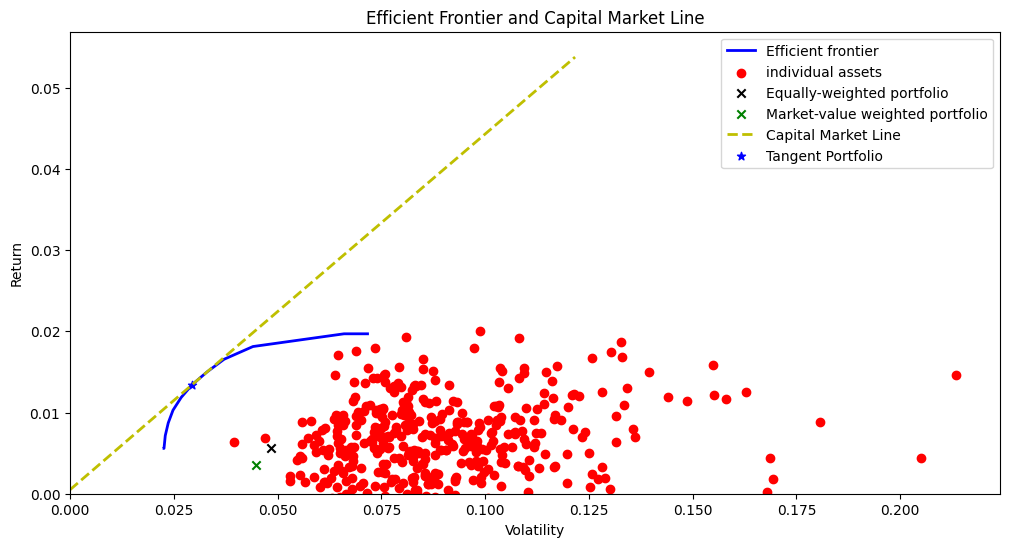

In [ ]:
# Define your data arrays for the efficient frontier, individual assets, and portfolios here
# ...

# Assuming you've already computed these values correctly
risk_free_rate_value = risk_free_rate.item()/12  # Risk-free rate value

# Compute Sharpe ratios for the efficient frontier
sharpe_ratios = ((efficient_frontier_returns_sorted - risk_free_rate_value) /
                 efficient_frontier_volatilities_sorted)

# Find the index of the maximum Sharpe ratio
max_sharpe_idx = np.argmax(sharpe_ratios)

# Get the return and volatility at the maximum Sharpe ratio
tangent_return = efficient_frontier_returns_sorted[max_sharpe_idx]
tangent_volatility = efficient_frontier_volatilities_sorted[max_sharpe_idx]

# Compute the max Sharpe ratio (this should be the slope of the CML)
max_sharpe_ratio_value = sharpe_ratios[max_sharpe_idx]

# Plot the CML from the risk-free rate to a point far out on the x-axis (volatility axis)
# We use the maximum Sharpe ratio as the slope of the line
cml_x = [0, tangent_volatility, max(efficient_frontier_volatilities_sorted) + 0.05]
cml_y = [risk_free_rate_value, tangent_return,
         risk_free_rate_value + max_sharpe_ratio_value * (cml_x[-1] - risk_free_rate_value)]

plt.figure(figsize=(12, 6))

# Plot the efficient frontier, individual assets, and portfolios
plt.plot(efficient_frontier_volatilities_sorted, efficient_frontier_returns_sorted, 'b-', linewidth=2, label="Efficient frontier")
plt.scatter(expected_volatilities, expected_returns, color='red', label='individual assets')
plt.scatter(p_eqweighted_monthly_volatilities, df_eq_por_m_return.mean(), color='black', marker='x', label='Equally-weighted portfolio')
plt.scatter(p_mvweighted_monthly_volatilities, df_mvweighted_por_m_return.mean(), color='green', marker='x', label='Market-value weighted portfolio')

# Plot the corrected CML
plt.plot(cml_x, cml_y, 'y--', linewidth=2, label='Capital Market Line')

# Highlight the tangent point (maximum Sharpe ratio)
plt.scatter(tangent_volatility, tangent_return, color='blue', marker='*', label='Tangent Portfolio')

# Set the axes limits and labels
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.legend()
plt.title('Efficient Frontier and Capital Market Line')

# Display the plot
plt.show()

#Question 4

## 4.1 Monthly Return - PAC

In [ ]:
 # Monthly return rate and volitality
 # Monthly return rate and volitality
## transpose
df_RI = df_return_PAC.set_index('NAME').T
df_RI = df_return_PAC.set_index('NAME').T[1:]
df_RI.reset_index(inplace=True)
df_RI.rename(columns={'index': 'Date'}, inplace=True)
df_RI['Date'] = pd.to_datetime(df_RI['Date']).dt.date
df_RI.set_index('Date', inplace=True)
df_RI
 df_returnRate_full = df_RI.iloc[1:] / df_RI.shift(1).iloc[1:] - 1
 display(df_returnRate_full)

NAME,ADBRI,ARISTOCRAT LEISURE,AMP,ANSELL,ANZ GROUP HOLDINGS,ASX,BENDIGO & ADELAIDE BANK,BHP GROUP,BANK OF QLND.,BEACH ENERGY,...,OVERSEA-CHINESE BKG.,COSCO SHIPPING INTERNATIONAL,UOL GROUP,FRASER AND NEAVE,SINGAPORE TELECOM,KEPPEL,SINGAPORE AIRLINES,OUE,FLEX,GENTING SINGAPORE
Date,,,,,,,,,,,,,,,,,,,,,
2000-02-29,-0.31615,-0.285561,-0.060953,-0.203724,-0.082271,0.151619,0.054009,-0.171358,0.001935,-0.146528,...,-0.258471,-0.032032,-0.115837,-0.104314,-0.020737,-0.028597,-0.113343,-0.128048,0.225153,0.060935
2000-03-31,-0.011631,-0.148047,0.042029,-0.025644,0.03171,-0.080614,-0.079966,0.098718,0.019637,0.16843,...,-0.020017,-0.016284,0.024267,0.027693,-0.121649,0.049505,0.007733,0.016941,0.157084,-0.080645
2000-04-30,-0.117176,-0.042805,-0.07136,-0.114665,0.098521,-0.11537,-0.01579,-0.004351,-0.070068,-0.230501,...,0.105719,-0.120357,0.010013,0.131723,0.009746,-0.013208,0.10822,-0.03422,-0.00266,-0.036799
2000-05-31,-0.152639,0.15433,-0.005397,0.143094,0.006894,-0.237808,-0.087727,-0.053235,-0.010221,-0.193665,...,-0.164565,-0.069522,-0.031555,-0.075076,-0.058674,-0.178967,-0.15951,-0.061409,-0.225089,-0.054198
2000-06-30,0.14684,0.323224,0.177778,-0.053672,0.114917,0.217168,0.092406,0.169781,0.083734,-0.139169,...,0.2234,0.208697,0.342416,0.199872,0.079061,0.170781,0.135131,0.042068,0.261768,-0.018318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31,-0.138019,-0.00515,0.055031,0.002305,-0.015202,-0.12677,-0.137758,0.041952,-0.076673,-0.073466,...,0.050549,-0.054036,-0.080504,-0.020677,0.013693,0.069981,-0.032404,0.036646,0.060117,-0.033612
2022-09-30,-0.215161,-0.134037,-0.11848,-0.109205,-0.058444,-0.128359,-0.167177,-0.100906,-0.126718,-0.184632,...,-0.048651,-0.105321,-0.065677,-0.070218,-0.012884,-0.070539,-0.067947,-0.070533,-0.064569,-0.015224
2022-10-31,-0.143634,0.121293,0.144548,0.117258,0.120146,-0.061706,0.150314,-0.026136,0.129931,0.065999,...,0.039704,-0.050472,-0.056148,0.009041,-0.047018,0.016905,0.045812,-0.017224,0.17527,0.039838


## 4.2 Expected Return and Covariance Matrix

In [ ]:
# Step 1: Select data between 2000-02-29 and 2007-12-31
df_returnRate_full.index = pd.to_datetime(df_returnRate_full.index)
df_selected = df_returnRate_full[(df_returnRate_full.index.year >= 2000) & (df_returnRate_full.index.year <= 2007)]
print(df_selected.head())

# Step 2: Calculate expected return and covariance matrix
# Expected rate of return - the average rate of return for each asset
expected_returns = df_selected.mean()
expected_returns = pd.DataFrame(expected_returns, columns=['Exp Return'])


# covariance matrix
df_selected_numeric = df_selected.apply(pd.to_numeric, errors='coerce')
covariance_matrix = df_selected_numeric.cov()


# Output the calculation results for verification
print("Expected Returns:\n", expected_returns.head()) # Display the first few lines as an example
print("\nCovariance Matrix:\n", covariance_matrix.head()) # Display the first few rows of the covariance matrix as an example

NAME           ADBRI ARISTOCRAT LEISURE       AMP    ANSELL  \
Date                                                          
2000-02-29  -0.31615          -0.285561 -0.060953 -0.203724   
2000-03-31 -0.011631          -0.148047  0.042029 -0.025644   
2000-04-30 -0.117176          -0.042805  -0.07136 -0.114665   
2000-05-31 -0.152639            0.15433 -0.005397  0.143094   
2000-06-30   0.14684           0.323224  0.177778 -0.053672   

NAME       ANZ GROUP HOLDINGS       ASX BENDIGO & ADELAIDE BANK BHP GROUP  \
Date                                                                        
2000-02-29          -0.082271  0.151619                0.054009 -0.171358   
2000-03-31            0.03171 -0.080614               -0.079966  0.098718   
2000-04-30           0.098521  -0.11537                -0.01579 -0.004351   
2000-05-31           0.006894 -0.237808               -0.087727 -0.053235   
2000-06-30           0.114917  0.217168                0.092406  0.169781   

NAME       BANK OF

In [ ]:
cov_matrix_df = pd.DataFrame(covariance_matrix, index=df_returnRate_full.columns, columns=df_returnRate_full.columns)
#Create a MultiIndex containing dates
multi_index = pd.MultiIndex.from_product([[pd.Timestamp('2007-12-31 00:00:00')], cov_matrix_df.columns], names=['Date', 'Asset'])

#Create a new DataFrame using the multi-level index created above
cov_matrix_with_date = pd.DataFrame(cov_matrix_df.values, index=multi_index, columns=cov_matrix_df.columns)

# Display new DataFrame
cov_matrix_with_date

NAME                              ADBRI  ARISTOCRAT LEISURE       AMP  \
Date       Asset                                                        
2007-12-31 ADBRI               0.012152            0.003285  0.001832   
           ARISTOCRAT LEISURE  0.003285            0.021611  0.006467   
           AMP                 0.001832            0.006467  0.009470   
           ANSELL              0.001251            0.004106  0.002297   
           ANZ GROUP HOLDINGS  0.002850            0.002281  0.002286   
...                                 ...                 ...       ...   
           KEPPEL              0.002649            0.000881  0.001954   
           SINGAPORE AIRLINES  0.001584            0.001752  0.002675   
           OUE                 0.001634            0.000827  0.001006   
           FLEX                0.006063            0.001976  0.002495   
           GENTING SINGAPORE   0.003198           -0.000604  0.002688   

NAME                             ANSELL  ANZ GROUP HOLDINGS       ASX  \
Date       Asset                                                        
2007-12-31 ADBRI               0.001251            0.002850  0.003111   
           ARISTOCRAT LEISURE  0.004106            0.002281  0.002026   
           AMP                 0.002297            0.002286  0.003014   
           ANSELL              0.006155            0.001195  0.000871   
           ANZ GROUP HOLDINGS  0.001195            0.003852  0.003018   
...                                 ...                 ...       ...   
           KEPPEL              0.000638            0.001792  0.003123   
           SINGAPORE AIRLINES  0.001560            0.001505  0.002377   
           OUE                 0.000054            0.001343  0.001572   
           FLEX                0.001467            0.001619  0.002635   
           GENTING SINGAPORE   0.001215            0.001651  0.002250   

NAME                           BENDIGO & ADELAIDE BANK  BHP GROUP  \
Date       Asset                                                    
2007-12-31 ADBRI                              0.002054   0.003508   
           ARISTOCRAT LEISURE                 0.001424   0.002091   
           AMP                                0.001460   0.003516   
           ANSELL                             0.001271   0.002516   
           ANZ GROUP HOLDINGS                 0.001653   0.002623   
...                                                ...        ...   
           KEPPEL                             0.001130   0.003167   
           SINGAPORE AIRLINES                 0.001204   0.002636   
           OUE                                0.000669   0.001079   
           FLEX                               0.003710   0.003489   
           GENTING SINGAPORE                  0.002538   0.001933   

NAME                           BANK OF QLND.  BEACH ENERGY  ...  \
Date       Asset                                            ...   
2007-12-31 ADBRI                    0.002419      0.004422  ...   
           ARISTOCRAT LEISURE       0.000478      0.001464  ...   
           AMP                      0.001673      0.002775  ...   
           ANSELL                   0.001637      0.002124  ...   
           ANZ GROUP HOLDINGS       0.002563      0.002400  ...   
...                                      ...           ...  ...   
           KEPPEL                   0.001737      0.002968  ...   
           SINGAPORE AIRLINES       0.001953      0.001683  ...   
           OUE                      0.001143      0.001081  ...   
           FLEX                     0.003393      0.003265  ...   
           GENTING SINGAPORE        0.002457      0.002499  ...   

NAME                           OVERSEA-CHINESE BKG.  \
Date       Asset                                      
2007-12-31 ADBRI                           0.002414   
           ARISTOCRAT LEISURE              0.002965   
           AMP                             0.002159   
           ANSELL                          0.001296   


In [ ]:
df_filtered = df_returnRate_full.loc['2001-01-31':'2020-12-31']
df_filtered

NAME,ADBRI,ARISTOCRAT LEISURE,AMP,ANSELL,ANZ GROUP HOLDINGS,ASX,BENDIGO & ADELAIDE BANK,BHP GROUP,BANK OF QLND.,BEACH ENERGY,...,OVERSEA-CHINESE BKG.,COSCO SHIPPING INTERNATIONAL,UOL GROUP,FRASER AND NEAVE,SINGAPORE TELECOM,KEPPEL,SINGAPORE AIRLINES,OUE,FLEX,GENTING SINGAPORE
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-31,0.087114,0.158513,-0.069502,-0.071843,0.031017,0.020608,0.125087,-0.014954,0.069341,-0.035326,...,-0.013225,-0.005568,0.007277,0.041424,0.035072,-0.064312,-0.098037,0.03101,0.337719,0.037255
2001-02-28,-0.088899,0.011049,-0.002328,-0.149951,-0.008613,-0.046949,-0.016727,0.068077,-0.071222,-0.04507,...,0.022999,0.199532,0.120591,0.051546,-0.01477,0.087606,-0.051692,0.049246,-0.304917,0.166352
2001-03-31,-0.112064,-0.008891,-0.049417,-0.048406,-0.167152,-0.107539,-0.083855,-0.130834,-0.106687,-0.114061,...,-0.13709,-0.060679,-0.105243,-0.097548,-0.334877,-0.134346,-0.11217,-0.099159,-0.433959,-0.275527
2001-04-30,0.393445,-0.000271,0.0444,-0.056901,0.067518,0.041752,0.066197,0.150771,0.123253,0.207547,...,-0.068073,0.047835,0.027763,0.058507,-0.050381,0.004009,0.056822,0.084656,0.792652,0.322148
2001-05-31,0.072581,-0.024568,0.008332,-0.054679,0.086126,0.018465,-0.001036,0.039747,0.046858,0.256434,...,0.018708,0.088697,-0.045572,-0.046048,-0.070506,0.08386,-0.111053,-0.078726,-0.061731,-0.028765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-31,0.192096,0.118581,0.077054,0.038896,0.054496,0.089742,-0.019745,0.068086,0.071785,0.108997,...,0.040304,0.008604,0.000989,-0.040041,-0.043338,-0.139799,0.076449,0.061704,-0.054833,-0.039401
2020-09-30,0.085596,0.024837,-0.173067,-0.068904,-0.082385,-0.087904,-0.104924,-0.086252,-0.084901,-0.15736,...,-0.032739,-0.064694,0.008105,-0.05456,-0.081954,-0.032288,-0.053144,-0.020615,0.025784,-0.046717
2020-10-31,-0.025151,-0.063146,0.148219,0.063005,0.075107,-0.037024,0.08523,-0.06646,0.108275,-0.122975,...,-0.000302,-0.011102,-0.064942,-0.045773,-0.042796,-0.013782,-0.023334,-0.051144,0.270211,-0.037597


In [ ]:
window = 96 # Number of months in 8 years

# Calculate rolling covariance matrix
Covar=df_filtered.rolling(window).cov().dropna()
Covar

NAME                              ADBRI  ARISTOCRAT LEISURE       AMP  \
Date       NAME                                                         
2008-12-31 ADBRI               0.012266            0.004283  0.003584   
           ARISTOCRAT LEISURE  0.004283            0.023431  0.008162   
           AMP                 0.003584            0.008162  0.010279   
           ANSELL              0.001608            0.004589  0.002948   
           ANZ GROUP HOLDINGS  0.004180            0.003655  0.003191   
...                                 ...                 ...       ...   
2020-12-31 KEPPEL              0.003238            0.002550  0.003188   
           SINGAPORE AIRLINES  0.003233            0.002748  0.002875   
           OUE                 0.003322            0.002681  0.003202   
           FLEX                0.003324            0.003089  0.003978   
           GENTING SINGAPORE   0.003273            0.003265  0.003533   

NAME                             ANSELL  ANZ GROUP HOLDINGS       ASX  \
Date       NAME                                                         
2008-12-31 ADBRI               0.001608            0.004180  0.004788   
           ARISTOCRAT LEISURE  0.004589            0.003655  0.003451   
           AMP                 0.002948            0.003191  0.003788   
           ANSELL              0.006222            0.001524  0.002183   
           ANZ GROUP HOLDINGS  0.001524            0.005156  0.003708   
...                                 ...                 ...       ...   
2020-12-31 KEPPEL              0.001809            0.002934  0.001492   
           SINGAPORE AIRLINES  0.000739            0.002920  0.001231   
           OUE                 0.002425            0.003017  0.001550   
           FLEX                0.003034            0.003454  0.001853   
           GENTING SINGAPORE   0.001838            0.003200  0.002123   

NAME                           BENDIGO & ADELAIDE BANK  BHP GROUP  \
Date       NAME                                                     
2008-12-31 ADBRI                              0.002593   0.004685   
           ARISTOCRAT LEISURE                 0.001918   0.002819   
           AMP                                0.001881   0.004464   
           ANSELL                             0.001549   0.003031   
           ANZ GROUP HOLDINGS                 0.002784   0.002824   
...                                                ...        ...   
2020-12-31 KEPPEL                             0.003072   0.003406   
           SINGAPORE AIRLINES                 0.003019   0.002392   
           OUE                                0.002668   0.002900   
           FLEX                               0.003095   0.002607   
           GENTING SINGAPORE                  0.004249   0.004368   

NAME                           BANK OF QLND.  BEACH ENERGY  ...  \
Date       NAME                                             ...   
2008-12-31 ADBRI                    0.003887      0.006296  ...   
           ARISTOCRAT LEISURE       0.001224      0.003905  ...   
           AMP                      0.002539      0.003556  ...   
           ANSELL                   0.002203      0.002388  ...   
           ANZ GROUP HOLDINGS       0.003673      0.003874  ...   
...                                      ...           ...  ...   
2020-12-31 KEPPEL                   0.003127      0.007204  ...   
           SINGAPORE AIRLINES       0.002891      0.005227  ...   
           OUE                      0.003241      0.005616  ...   
           FLEX                     0.003943      0.005953  ...   
           GENTING SINGAPORE        0.004119      0.008748  ...   

NAME                           OVERSEA-CHINESE BKG.  \
Date       NAME                                       
2008-12-31 ADBRI                           0.003047   
           ARISTOCRAT LEISURE              0.003555   
           AMP                             0.002970   
           ANSELL                          0.001904   


## 4.3 Calculate Optimal Weights

In [ ]:
len(Covar.index.levels)

2

In [ ]:
# Define optimization objective function: minimize portfolio variance
def portfolio_variance(weights, covariance_matrix):
     return weights.T @covariance_matrix @weights

# Constraint: The sum of weights is 1
constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})

# Function to calculate the optimal weight configuration for each year
def calculate_optimal_weights(covariance_matrix):
     num_assets = covariance_matrix.shape[0] # Use shape[0] to ensure correct acquisition of asset quantities in the case of a two-dimensional covariance matrix
     initial_weights = np.ones(num_assets) / num_assets #Initial weights
     bounds = tuple((0, 1) for asset in range(num_assets)) # Bounds of weight

     result = minimize(portfolio_variance, initial_weights, args=(covariance_matrix,),
                       method='SLSQP', bounds=bounds, constraints=constraints)

     if result.success:
         return result.x
     else:
         raise ValueError("Optimization failed.")

# Dictionary that stores the optimal weights for each year
optimal_weights_annual = {}

# Calculate the optimal weight configuration on December 31, 2007
cov_matrix_2007 = cov_matrix_with_date.values # Assume this is the covariance matrix of December 31, 2007
optimal_weights_annual['2007-12-31'] = calculate_optimal_weights(cov_matrix_2007)

# Calculate the optimal weight configuration from 2008 to 2020

# Traverse Covar and select the data on December 31 of each year for optimization
for date, cov_matrix in Covar.groupby(level='Date'):
     if date.month == 12 and date.day == 31:
         # Calculate the optimal weight only when the date is December 31st
         optimal_weights_annual[date.strftime('%Y-%m-%d')] = calculate_optimal_weights(cov_matrix.values)

# Output results
for date, weights in optimal_weights_annual.items():
     print(f"Optimal weights for {date}: {weights}")

Optimal weights for 2007-12-31: [0.00000000e+00 2.00636051e-18 1.48274584e-18 3.79943577e-18
 0.00000000e+00 0.00000000e+00 5.90131354e-04 5.67896904e-19
 0.00000000e+00 0.00000000e+00 3.05994708e-02 5.21390875e-19
 6.12444653e-19 6.39754935e-20 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 3.30364472e-18 2.77169141e-18
 0.00000000e+00 5.72440783e-19 1.25315232e-18 0.00000000e+00
 1.55583280e-18 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 9.90609667e-04 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.90670510e-18 0.00000000e+00 5.80209651e-19 1.07886301e-18
 0.00000000e+00 1.82643387e-18 0.00000000e+00 0.00000000e+00
 1.82343445e-18 0.00000000e+00 8.31510171e-19 1.31327338e-18
 0.00000000e+00 5.09550311e-20 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.24965492e-18 7.19200890e-19 0.00000000e+00
 6.55246016e-19 2.60181182e-02 0.00000000e+00 0.00000000e+00
 2.21385979e-18 0.00000000e+00 2.08945808e-18 0.00000

## 4.4 Update the weights monthly & 4.5 Compute the ex-post performance

In [ ]:
# Initialize the structure that stores monthly returns
portfolio_monthly_returns = pd.Series(index=df_returnRate_full.index)

for year in range(2008, 2022):
     # Build the key using the last day of the year to get the optimal weight at the end of the previous year
     key = f'{year - 1}-12-31'
     if key in optimal_weights_annual:
         current_weights = optimal_weights_annual[key]
     else:
         print(f"Warning: No optimal weights found for year ending {key}. Skipping this year.")
         continue # If no weight is found, skip this year

     for month in range(1, 13):
         current_month_date = pd.Timestamp(year=year, month=month, day=1) + pd.offsets.MonthEnd(1)

         if current_month_date in df_returnRate_full.index:
             monthly_returns = df_returnRate_full.loc[current_month_date]
             portfolio_return = np.dot(current_weights, monthly_returns)
             portfolio_monthly_returns[current_month_date] = portfolio_return

             # If it is not December, update the weight based on the performance of the current month
             if month != 12:
                 next_month_date = current_month_date + pd.offsets.MonthBegin(1)
                 if next_month_date in df_returnRate_full.index: # Ensure that the weight is still in the same year when updating it
                     updated_weights = current_weights * (1 + monthly_returns) / (1 + portfolio_return)
                     normalized_weights = updated_weights / np.sum(updated_weights)
                     current_weights = normalized_weights # Update weights for next month’s calculations

# Limit the range of portfolio_monthly_returns to 2008-01-31 to 2021-01-31
portfolio_monthly_returns = portfolio_monthly_returns['2008-01-31':'2021-01-31']

<ipython-input-147-29d6bc11bc69>:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  portfolio_monthly_returns = pd.Series(index=df_returnRate_full.index)


In [ ]:
portfolio_monthly_returns

Date
2008-01-31   -0.019505
2008-02-29    0.015991
2008-03-31    0.028512
2008-04-30    0.018082
2008-05-31    0.030861
                ...   
2020-09-30   -0.015903
2020-10-31   -0.028489
2020-11-30    0.072467
2020-12-31    0.028803
2021-01-31    0.012445
Length: 157, dtype: float64

In [ ]:
df_Rf_full = pd.read_csv('https://raw.githubusercontent.com/YUEWU1233/Pacific-firms-with-available-scope-1-to-3-carbon-emissions/main/Rf.csv')
df_Rf_full['DATE'] = pd.to_datetime(df_Rf_full['DATE']) # Convert 'DATE' to datetime
df_Rf_full.rename(columns={'RIFLGFCM01NA': 'Annulized Rf'}, inplace=True)
df_Rf_full.set_index('DATE', inplace=True) # Set 'DATE' as the index
df_Rf = df_Rf_full[(df_Rf_full.index.year >= 2008) & (df_Rf_full.index.year <= 2021)]

# Calculate average monthly return
average_monthly_return = portfolio_monthly_returns.mean()

# Adjust the calculation of the annualized average return: use the monthly average return multiplied by 12
annualized_average_return = average_monthly_return * 12

# Calculate annualized volatility
annualized_volatility = portfolio_monthly_returns.std() * np.sqrt(12)

# Calculate the annualized average of the monthly risk-free interest rate
annualized_rf = df_Rf['Annulized Rf'].mean()/100

# Calculate the Sharpe ratio, using the adjusted annualized risk-free rate
sharpe_ratio = (annualized_average_return - annualized_rf) / annualized_volatility

# Calculate the minimum rate of return and the maximum rate of return
min_return = portfolio_monthly_returns.min()
max_return = portfolio_monthly_returns.max()

# Print portfolio characteristics
print(f"Annualized Average Return: {annualized_average_return}")
print(f"Annualized Volatility: {annualized_volatility}")
print(f"Sharpe Ratio: {sharpe_ratio}")
print(f"Minimum Monthly Return: {min_return}")
print(f"Maximum Monthly Return: {max_return}")

Annualized Average Return: 0.06886451767486905
Annualized Volatility: 0.12090365945585603
Sharpe Ratio: 0.5271630861559545
Minimum Monthly Return: -0.17495403791061065
Maximum Monthly Return: 0.07392839101844911


## 4.6 Value-Weighted Portfolio

In [ ]:
# df_MV_full includes market value during 2000-2022
start_date = pd.Timestamp('2007-12-31')
end_date = pd.Timestamp('2020-12-31')

df_MV = df_MV_full[(df_MV_full.index >= start_date) & (df_MV_full.index <= end_date)]

df_MV

NAME,ADBRI,ARISTOCRAT LEISURE,AMP,ANSELL,ANZ GROUP HOLDINGS,ASX,BENDIGO & ADELAIDE BANK,BHP GROUP,BANK OF QLND.,BEACH ENERGY,...,OVERSEA-CHINESE BKG.,COSCO SHIPPING INTERNATIONAL,UOL GROUP,FRASER AND NEAVE,SINGAPORE TELECOM,KEPPEL,SINGAPORE AIRLINES,OUE,FLEX,GENTING SINGAPORE
Date,,,,,,,,,,,,,,,,,,,,,
2007-12-31,1659.21,4586.37,16379.96,1468.12,46288.58,9084.7,3335.24,118285.73,2261.62,1171.1,...,18005.83,8985.07,2499.66,5684.45,44236.84,14314.95,14318.37,2045.76,10034.61,4583.18
2008-01-31,1705.69,4101.94,14054.2,1455.21,44566.76,7224.26,2871.02,110963.47,1906.0,1098.98,...,16433.21,7025.24,2027.48,4698.07,40995.48,12674.95,12886.26,2133.0,9735.06,4144.9
2008-02-29,1803.14,4500.43,14117.77,1642.39,39530.5,6730.36,2435.46,124254.08,1895.0,1206.01,...,17175.12,6548.97,2226.48,4875.25,43956.36,12274.8,13048.53,2182.26,8461.07,4316.88
2008-03-31,1690.25,4054.04,13434.94,1452.44,39549.63,5843.1,2797.51,109707.21,2194.1,1026.97,...,18376.03,5994.2,2229.67,4882.62,45169.57,11409.14,13427.16,1994.34,7835.25,4193.12
2008-04-30,1775.59,3273.96,13833.88,1476.04,39654.2,5788.44,2994.17,133684.0,2233.35,1015.87,...,20380.07,5211.45,2228.05,4886.7,45264.11,12090.11,13981.16,2024.36,8669.68,4327.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-31,1230.07,13397.26,3888.53,3676.61,38342.0,12504.7,2563.27,82590.54,2059.69,2564.47,...,28113.21,324.45,4076.42,1375.84,27623.41,6132.76,7993.49,866.37,5439.64,6226.65
2020-09-30,1332.41,13716.54,3214.44,3417.72,35005.25,11242.25,2294.38,75167.05,1865.94,2158.39,...,27192.77,303.47,4109.57,1295.95,25359.19,5934.72,7568.74,848.5,5579.89,5935.83
2020-10-31,1296.31,12838.37,3692.47,3627.53,37519.85,10826.01,2489.93,69882.38,2048.37,1890.47,...,27600.88,300.1,3842.82,1231.85,24275.37,5852.96,7392.03,805.12,7091.38,5712.64


In [ ]:
# Step 1: Calculate the weighted proportion of the starting period
initial_weights = df_MV.loc['2007-12-31'] / df_MV.loc['2007-12-31'].sum()

# Initialize the structure that stores monthly portfolio returns
portfolio_monthly_returns_vw = pd.Series(index=df_returnRate_full.loc['2008-01-31':'2021-01-31'].index)

# Assume the initial weight calculation is correct
initial_weights = df_MV.loc['2007-12-31'] / df_MV.loc['2007-12-31'].sum()
portfolio_monthly_returns_vw['2008-01-31'] = (df_returnRate_full.loc['2008-01-31'] * initial_weights).sum()

# Traverse each month starting from February 2008 to the end of the sample
for date in df_returnRate_full.loc['2008-02-29':'2021-01-31'].index:
     prev_month_end = date - pd.offsets.MonthEnd(1) # Use MonthEnd to ensure it always points to the end of the month
     if prev_month_end in df_MV.index:
         # If it exists, calculate the weighted proportion of the previous month
         prev_month_weights = df_MV.loc[prev_month_end] / df_MV.loc[prev_month_end].sum()
         # Use these weightings to calculate the portfolio return for the current month
         portfolio_monthly_returns_vw[date] = (df_returnRate_full.loc[date] * prev_month_weights).sum()
     else:
         # If the data of the previous month does not exist, you can choose to skip or adopt other processing logic
         print(f"Data for {prev_month_end} not found. Skipping or handling otherwise.")

# Clean the results and remove NaN values
portfolio_monthly_returns_vw.dropna(inplace=True)
portfolio_monthly_returns_vw

<ipython-input-157-a4d335387df6>:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  portfolio_monthly_returns_vw = pd.Series(index=df_returnRate_full.loc['2008-01-31':'2021-01-31'].index)


Date
2008-01-31   -0.070998
2008-02-29    0.015953
2008-03-31   -0.039735
2008-04-30    0.066434
2008-05-31    0.010290
                ...   
2020-09-30   -0.013416
2020-10-31   -0.013346
2020-11-30    0.130342
2020-12-31    0.044788
2021-01-31   -0.005659
Length: 157, dtype: float64

In [ ]:
# Calculate the annualized average return
annualized_avg_return_vw = portfolio_monthly_returns_vw.mean() * 12

# Calculate annualized volatility
annualized_volatility_vw = portfolio_monthly_returns_vw.std() * np.sqrt(12)

# Calculate Sharpe ratio
annualized_rf = df_Rf_full.loc['2018-01-31':'2021-1-31', 'Annulized Rf'].mean()/100
sharpe_ratio_vw = (annualized_avg_return_vw - annualized_rf) / annualized_volatility_vw

# Minimum rate of return and maximum rate of return
min_return_vw = portfolio_monthly_returns_vw.min()
max_return_vw = portfolio_monthly_returns_vw.max()

# print results
print(f"Annualized Average Return: {annualized_avg_return_vw}")
print(f"Annualized Volatility: {annualized_volatility_vw}")
print(f"Sharpe Ratio: {sharpe_ratio_vw}")
print(f"Minimum Return: {min_return_vw}")
print(f"Maximum Return: {max_return_vw}")

Annualized Average Return: 0.053635070900561826
Annualized Volatility: 0.1573104207697803
Sharpe Ratio: 0.2877648156579804
Minimum Return: -0.1641611374269938
Maximum Return: 0.13034174223197836
